In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rku68\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris=pd.read_csv(r"C:\Users\rku68\OneDrive\Desktop\csv\irisraw.csv")

In [3]:
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
iris.shape

(150, 4)

In [5]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

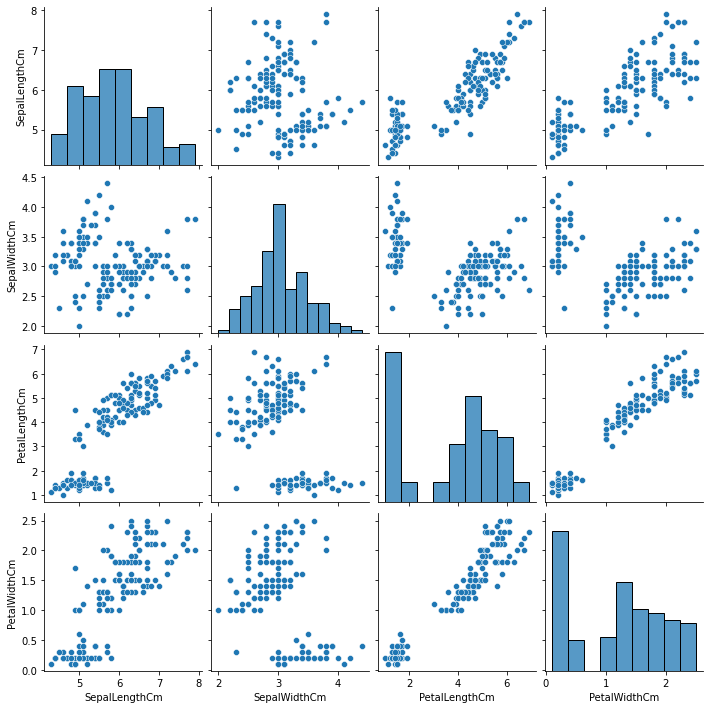

In [6]:
sns.pairplot(iris)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss= []

In [9]:
for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(iris)
    wcss.append(km.inertia_)
    

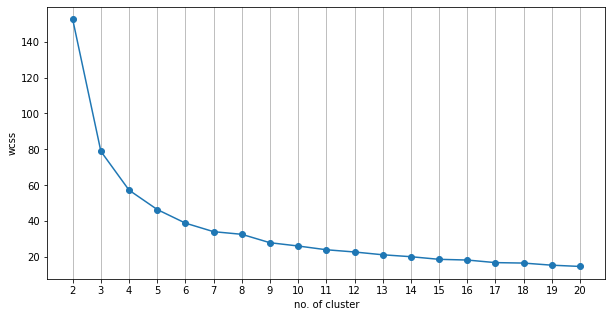

In [13]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker='o')
plt.xlabel('no. of cluster')
plt.xticks([i for i in range(2,21)])
plt.ylabel('wcss')
plt.grid(axis='x')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
kmn=KMeans(n_clusters=3)
iris['predict']=kmn.fit_predict(iris)

In [16]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
silhouette_score(iris,labels=kmn.labels_)

0.684936462996038

In [18]:
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


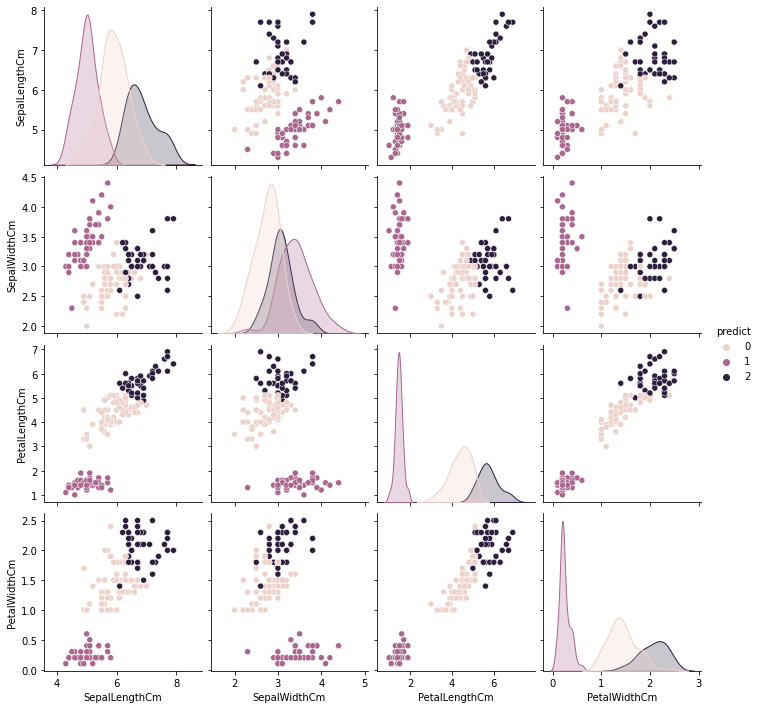

In [19]:
sns.pairplot(iris,hue='predict')
plt.savefig('predict.jpg')
plt.show()

In [21]:
org_iris=pd.read_csv(r"C:\Users\rku68\OneDrive\Desktop\csv\iris.csv")

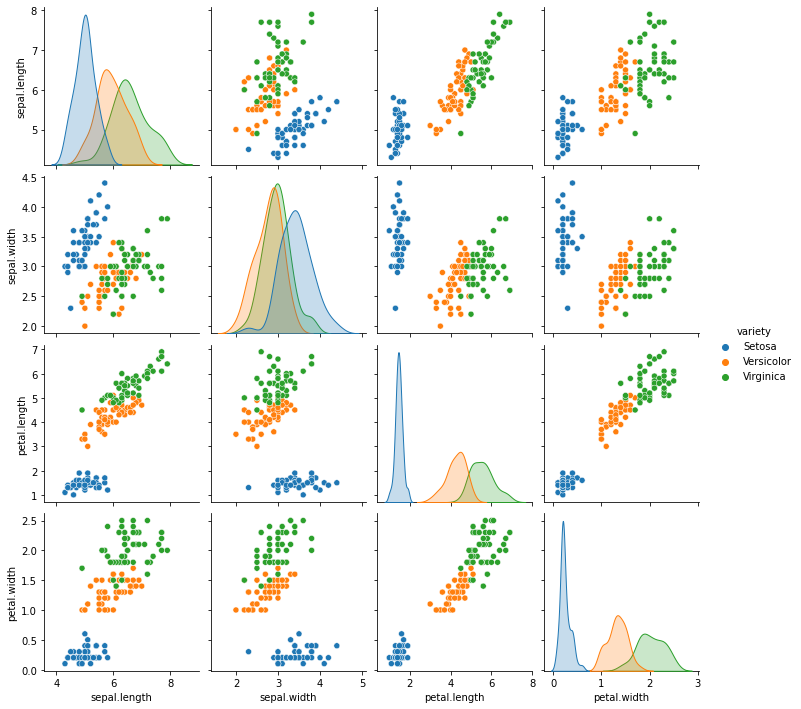

In [22]:
sns.pairplot(org_iris,hue='variety')
plt.savefig('org.jpg')
plt.show()

In [23]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km1.fit(iris)
    ss.append(silhouette_score(iris,km1.labels_))

In [ ]:
plt.plot(no_c,ss,marker='o')
plt.xlabel('no. of clusters')
plt.xticks(no_c)
plt.ylabel('silhouettescore')
plt.grid(axis='x')
plt.show()